# Problem Statement:
---
This is a kaggle competetion, in which the goal is to recognize hand-written digits using convolutional neural networks.

# Importing Libraries/Dataset:
---

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import datetime
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('../Datasets/Digit Recognizer/train.csv')
df_test = pd.read_csv('../Datasets/Digit Recognizer/test.csv')

In [3]:
x = df_train.iloc[:, 1:].values.reshape(42000, 28,28)
y = df_train.iloc[:,0].values

In [4]:
x_test = df_test.values.reshape(28000, 28,28)

# Visualizing The Data:
---

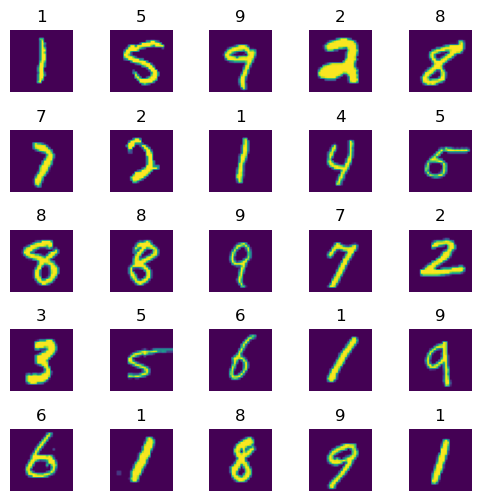

In [5]:
m = x.shape[0]

fig, ax = plt.subplots(5,5,figsize=(5,5))
fig.tight_layout(pad=0.1)

for i, ax in enumerate(ax.flat):
    rand = np.random.randint(m)
    
    ax.imshow(x[rand].reshape(28,28))
    ax.set_title(y[rand])
    ax.set_axis_off()

# Preparing The Data For Training:
---

In [6]:
# Normalizing The Data:
x = x/255
x_test = x_test/255
# Splitting The Data Into Training/Validation:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.1, random_state=1)

In [7]:
# Checking the shapes of the data:
print(f'x_train shape: {x_train.shape}')
print(f'x_valid shape: {x_valid.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_valid shape: {y_valid.shape}')

x_train shape: (37800, 28, 28)
x_valid shape: (4200, 28, 28)
y_train shape: (37800,)
y_valid shape: (4200,)


# Bulding The Model:
---

In [8]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D # convolution layers
from keras.layers import Dense, Dropout, Flatten # core layers
from keras.layers import BatchNormalization

model=Sequential()

model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())    

model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
    
model.add(Flatten())
model.add(Dense(512,activation="relu"))
    
model.add(Dense(10,activation="softmax"))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 12, 12, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 128)         1

In [9]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics='acc')

# Data Augmentation
---

In [10]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.01, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

train_gen = datagen.flow(x_train.reshape(37800,28,28,1), y_train, batch_size=128)
valid_gen = datagen.flow(x_valid.reshape(4200,28,28,1), y_valid, batch_size=128)

# Training The Model:
---

In [11]:
history = model.fit_generator(train_gen, 
                              epochs = 30, 
                              validation_data = valid_gen
                              )

Epoch 1/30
296/296 [==============================] - 132s 441ms/step - loss: 0.1560 - acc: 0.9507 - val_loss: 2.6123 - val_acc: 0.1176
Epoch 2/30
296/296 [==============================] - 129s 435ms/step - loss: 0.0642 - acc: 0.9804 - val_loss: 0.0738 - val_acc: 0.9793
Epoch 3/30
296/296 [==============================] - 155s 523ms/step - loss: 0.0500 - acc: 0.9847 - val_loss: 0.1042 - val_acc: 0.9710
Epoch 4/30
296/296 [==============================] - 169s 570ms/step - loss: 0.0418 - acc: 0.9870 - val_loss: 0.0511 - val_acc: 0.9857
Epoch 5/30
296/296 [==============================] - 195s 658ms/step - loss: 0.0415 - acc: 0.9871 - val_loss: 0.0429 - val_acc: 0.9862
Epoch 6/30
296/296 [==============================] - 232s 782ms/step - loss: 0.0305 - acc: 0.9903 - val_loss: 0.0516 - val_acc: 0.9862
Epoch 7/30
296/296 [==============================] - 244s 825ms/step - loss: 0.0339 - acc: 0.9894 - val_loss: 0.0496 - val_acc: 0.9864
Epoch 8/30
296/296 [============================

# Visualizing The Performance:
---

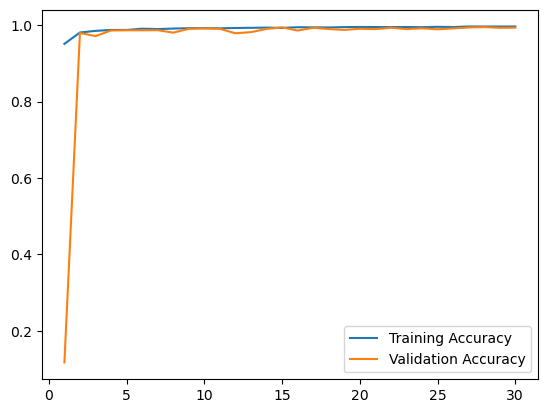

In [13]:
acc = history.history['acc']
valid_acc = histoacc = history.history['acc']
valid_acc = history.history['val_acc']
plt.plot(range(1,31), acc, label='Training Accuracy')
plt.plot(range(1,31), valid_acc, label='Validation Accuracy')
plt.legend()

# Creating Submission CSV:
---

In [14]:
predictions = model.predict(x_test)

875/875 [==============================] - 20s 23ms/step


In [15]:
df = pd.DataFrame({'ImageId':range(1,28001),
                   'Label': [prediction.argmax() for prediction in predictions]})
df.set_index('ImageId', inplace=True)
df

,Label
ImageId,
1,2
2,0
3,9
4,0
5,3
...,...
27996,9
27997,7
27998,3


In [16]:
df.to_csv('digit_recognizer_submission.csv')